In [34]:
import matplotlib.pyplot as plt
from vitRet.data.segmentation import MaplesDR
import torch

In [35]:
datamodule = MaplesDR('/home/clement/Documents/data/Maples-DR/', 
                      superpixels_nb=8192,
                      batch_size=2, num_workers=1)
datamodule.setup('fit')
daloader = datamodule.train_dataloader()

In [36]:
batch = next(iter(daloader))

gt = batch['label']
segment = batch['segments']

In [37]:
from torch_scatter import scatter_add

output = scatter_add(gt.flatten(-2), segment.unsqueeze(1).flatten(2), dim=-1)
gt_segment = output.argmax(1, keepdim=True)
gt_segment = torch.zeros_like(output).scatter_(1, gt_segment, 1)


torch.Size([2, 512, 512])


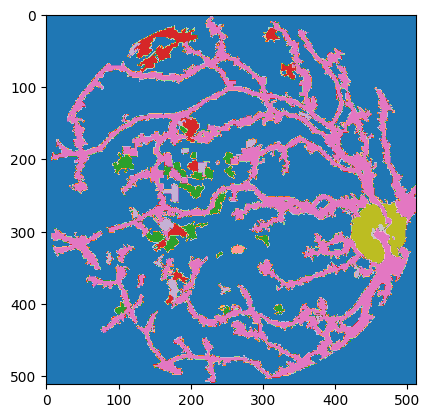

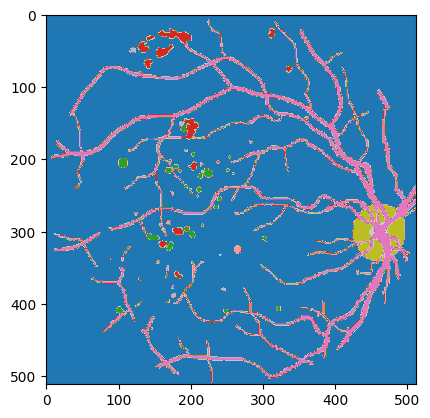

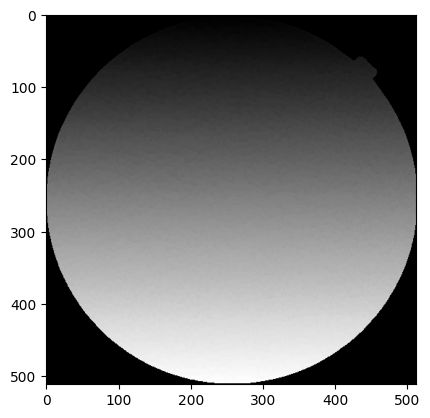

In [40]:
bg = (torch.amax(gt_segment, 1, keepdim=True)==0)
multilabel_gt = torch.cat((bg, gt_segment), 1)

reconstructed_gt = torch.gather(multilabel_gt.argmax(1)-1, -1, segment.flatten(1)).view(-1, *segment.shape[-2:])
print(reconstructed_gt.shape)
plt.imshow(reconstructed_gt[0], vmax=13, vmin=0, cmap='tab20')
plt.show()
plt.imshow(gt.argmax(1)[0], vmax=13, vmin=0, cmap='tab20')
plt.show()
plt.imshow(segment[0])
plt.show()

In [39]:
multiclass_gt[]

SyntaxError: invalid syntax (4223824011.py, line 1)